In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics, tree
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
# Importing clean, ready to go dataset from previous exercise 2
df = pd.read_csv("log_reg_df_clean.csv")
metrics_df = pd.read_csv("metrics_df.csv")

# X = everything else in the DataFrame minus the target variable
# y = only the target variable
X = df.drop('booking_status', axis=1)
y = df['booking_status']

# split the data into train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [12]:
# Fit the decision tree classifier with default hyper-parameters
clf = DecisionTreeClassifier(random_state=42)
model = clf.fit(X, y)

In [13]:
from sklearn.tree import export_graphviz
import subprocess
from sklearn import tree

# Export the decision tree to DOT format
export_graphviz(clf, 
                   feature_names=X.columns,  
                   class_names=["No", "Yes"],
                   filled=True, rounded=True, node_ids=True, out_file='tree.dot')



# Convert DOT to SVG
subprocess.call(['dot', '-Tsvg', 'tree.dot', '-o', 'tree.svg'])

# if you only want to visualize without saving to file:

# adjust figsize for a different size
# fig = plt.figure(figsize=(30,12))
# _ = tree.plot_tree(clf, 
#                   feature_names=X.columns,  
#                   class_names=["No", "Yes"],
#                   filled=True, rounded=True, fontsize=12, node_ids=True
#                   )

0

In [15]:
model = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=42))
model.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [17]:
 # get predictions for error metrics
predictions = model.predict(X_test)
 # print the classification report based on true values and predictions
report = classification_report(y_test, predictions, output_dict=True)
# get overall accuracy of the model
acc = round(accuracy_score(y_test, predictions), 2)
# get roc acu score of the model
roc_auc = roc_auc_score(y_test.values, model.predict_proba(X_test)[:, 1])

metrics_df["RFC"] = [acc,
                           round(report['macro avg']['precision'], 2),
                           round(report['macro avg']['recall'], 2),
                           round(report['macro avg']['f1-score'], 2),
                           round(report['weighted avg']['precision'], 2),
                           round(report['weighted avg']['recall'], 2),
                           round(report['weighted avg']['f1-score'], 2),
                           roc_auc]
# save metrics 
metrics_df.to_csv('metrics_df.csv')
metrics_df




,Unnamed: 0.1,Unnamed: 0,Metric,Basic Model,StandardScaler + Regularization + LogisticRegression,Basic SVC,"SVC, linear kernel","SVC, rbf hightuned","SVC, poly kernel","SVC, sigmoid kernel",LinearSVC,NuSVC,"NuSVC, poly kernel",RFC
0,0,0,Total accuracy,0.78,0.81,0.82,0.78,0.85,0.83,0.69,0.880000,0.850000,0.83,0.880000
1,1,1,Macro precision,0.77,0.80,0.81,0.76,0.84,0.82,0.65,0.870000,0.840000,0.82,0.870000
2,2,2,Macro recall,0.75,0.78,0.78,0.74,0.81,0.80,0.65,0.860000,0.820000,0.79,0.860000
3,3,3,Macro F1,0.75,0.78,0.79,0.75,0.82,0.81,0.65,0.860000,0.820000,0.80,0.860000
4,4,4,Weighted precision,0.78,0.81,0.82,0.78,0.84,0.83,0.69,0.880000,0.840000,0.83,0.880000
5,5,5,Weighted recall,0.78,0.81,0.82,0.78,0.85,0.83,0.69,0.880000,0.850000,0.83,0.880000
6,6,6,Weighted F1,0.78,0.81,0.82,0.78,0.84,0.83,0.69,0.880000,0.840000,0.83,0.880000
7,7,7,ROC AUC,0.76,0.61,0.88,0.84,0.88,0.87,0.71,0.933905,0.877527,0.87,0.933905


<Axes: >

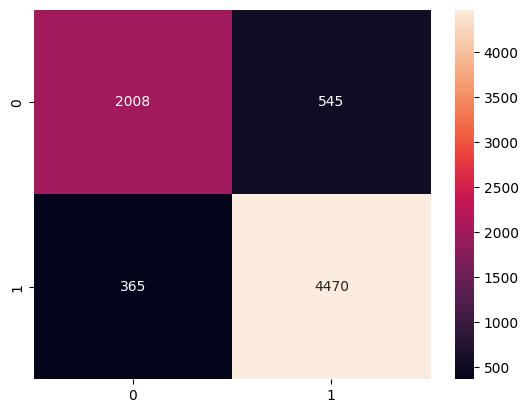

In [18]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='g')

In [ ]:
# parameters you can try optimizing for RandomForestClassifier
# criterion , options: "gini", "entropy", "log_loss", default="gini"
# n_estimators: default = 100, the number of decision trees created for the data
# class_weight, options: "balanced", "balanced_subsample"
# ccp_alpha: Complexity parameter, non-negative float, default=0.0. Typical values 0.0 - 0.05.
